<a href="https://colab.research.google.com/github/rmahesh6386/Tata-Motors-Project-/blob/main/TATA_Motors_Stock_market_Forecasting_V2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project: Stock Market Analysis and Prediction of TATA Motors Pvt Ltd

## Stock Market Data From Yahoo Finance

### Introduction

   Stock Market Analysis and Prediction is the project on technical analysis, visualization and prediction using data provided by Yahoo Finance. By looking at data from the stock market of a technology giant like TATA motors. Used pandas to get stock information, visualize different aspects of it, and finally looked at a few ways of analyzing the risk of a stock, based on its previous performance history.
   
### Questions

In this analysis, I would like to explore the following questions.

1. What was the change in price of the stock over time?
2. What was the daily return of the stock on average?
3. What was the moving average of the various stocks?
4. What was the correlation between different stocks' closing prices?
4. What was the correlation between different stocks' daily returns?
5. How much value do we put at risk by investing in a particular stock?
6. How can we attempt to predict future stock behavior?

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')
import sys
sys.path.append('/content/gdrive/My Drive/Colab Notebooks')

Mounted at /content/gdrive


In [2]:
# For reading stock data from yahoo
from pandas_datareader import data as pdr
import yfinance as yfin
yfin.pdr_override()

# For time stamps
from datetime import datetime

# For division
from __future__ import division

In [3]:
import pandas as pd
#df=pd.read_csv("TATAMOTORS.csv")
#df

In [4]:
#stock Company for analytics
stock = ['TATAMOTORS.NS']
data_source = 'yahoo' 

# set up Start and End time for data grab
end = datetime.now()
start = datetime(end.year-10,end.month,end.day)

# Set DataFrame as the Stock Ticker
TM = pdr.get_data_yahoo(stock,start,end)

[*********************100%***********************]  1 of 1 completed


In [5]:
TM=TM.dropna()

In [6]:
TM

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-07-19,222.117569,224.096344,221.424988,222.414383,219.881226,6677436
2012-07-20,221.622879,223.057480,219.693573,221.029236,218.511856,3940979
2012-07-23,218.555771,218.654709,212.718384,213.757233,211.322678,5761220
2012-07-24,214.202469,215.488663,211.085892,213.559357,211.127060,7368372
2012-07-25,211.432175,212.916260,208.859772,210.739609,208.339432,6799635
...,...,...,...,...,...,...
2022-07-13,432.700012,435.850006,425.649994,427.100006,427.100006,10181698
2022-07-14,428.000000,431.250000,423.299988,428.049988,428.049988,10744547
2022-07-15,430.649994,441.750000,429.700012,440.200012,440.200012,15774084


In [7]:
Tatamotors = TM['Close']

In [9]:
Tatamotors

Date
2012-07-19    222.414383
2012-07-20    221.029236
2012-07-23    213.757233
2012-07-24    213.559357
2012-07-25    210.739609
                 ...    
2022-07-13    427.100006
2022-07-14    428.049988
2022-07-15    440.200012
2022-07-18    450.899994
2022-07-19    445.600006
Name: Close, Length: 2464, dtype: float64

In [10]:
Tatamotors.describe()

count    2464.000000
mean      338.166228
std       129.438491
min        65.300003
25%       251.787506
50%       345.865250
75%       440.418861
max       598.134399
Name: Close, dtype: float64

In [11]:
import plotly.express as px
import matplotlib.pyplot as plt
fig = px.line(Tatamotors, y="Close", title='Tatamotors closing price')
fig.show()

First, we need to check if a series is stationary or not because time series analysis only works with stationary data.

**ADF (Augmented Dickey-Fuller) Test**

Null Hypothesis: The series has a unit root (value of a =1)


Alternate Hypothesis: The series has no unit root.


If we fail to reject the null hypothesis, we can say that the series is non-stationary. This means that the series can be linear or difference stationary.


If both mean and standard deviation are flat lines(constant mean and constant variance), the series becomes stationary.

In [13]:
from statsmodels.tsa.stattools import adfuller
def check_stationarity(series):
    result = adfuller(series.values)

    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))

    if (result[1] <= 0.05) & (result[4]['5%'] > result[0]):
        print("\u001b[32mStationary\u001b[0m")
    else:
        print("\x1b[31mNon-stationary\x1b[0m")

check_stationarity(Tatamotors)     

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



ADF Statistic: -1.632778
p-value: 0.466037
Critical Values:
	1%: -3.433
	5%: -2.863
	10%: -2.567
Non-stationary


We see that the p-value is greater than 0.05 so we cannot reject the Null hypothesis. Also, the test statistics is greater than the critical values. so the data is non-stationary.


In order to perform a time series analysis, we may need to separate seasonality and trend from our series. The resultant series will become stationary through this process.

<Figure size 432x288 with 0 Axes>

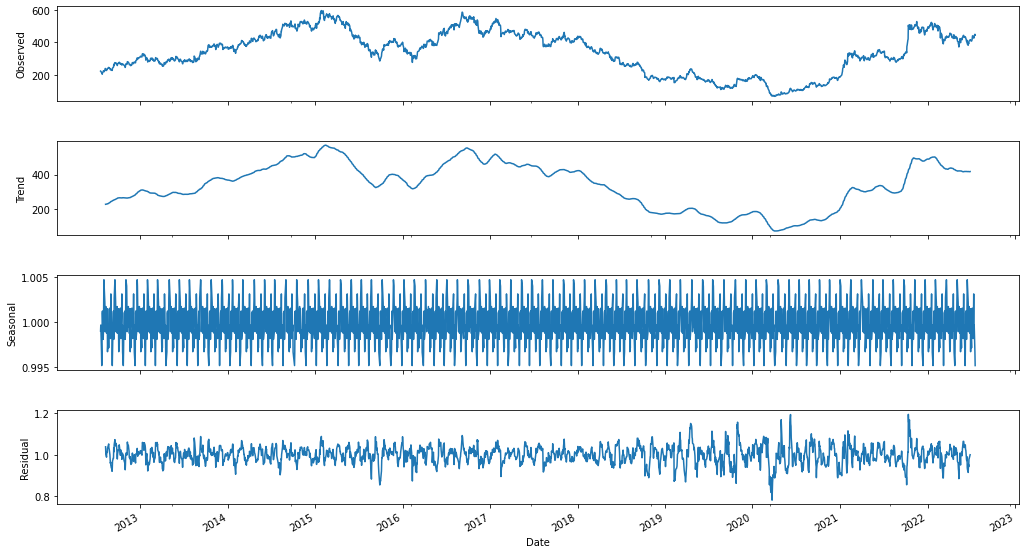

In [14]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(Tatamotors, model='multiplicative', freq = 30)
fig = plt.figure()  
fig = result.plot()  
fig.set_size_inches(16, 9)

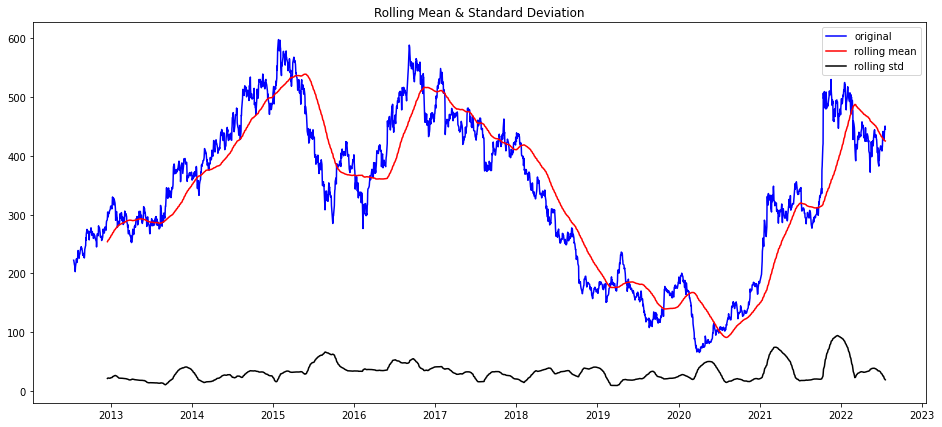

In [16]:
rollmean=Tatamotors.rolling(100).mean()
rollstd=Tatamotors.rolling(100).std()

plt.figure(figsize=(16,7))
fig=plt.figure(1)

#PLOT ROLLING sTATISTICS:
orig = plt.plot(Tatamotors,color = 'blue',label='original')
mean = plt.plot(rollmean,color = 'red',label = 'rolling mean')
std = plt.plot(rollstd,color = 'black',label = 'rolling std')
plt.legend(loc = 'best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block = False)

We start by taking a log of the series to reduce the magnitude of the values and reduce the rising trend in the series. Then after getting the log of the series, we find the rolling average of the series. A rolling average is calculated by taking input for the past 12 months i.e **365 days** and giving a mean consumption value at every point further ahead in series.

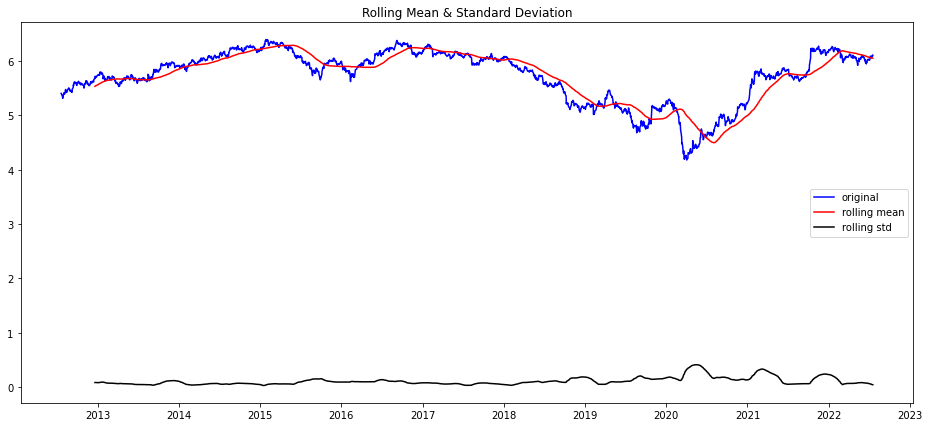

In [40]:
#USING LOG TRANSFORM
import numpy as np
ts_log=np.log(Tatamotors)

rollmean=ts_log.rolling(100).mean()
rollstd=ts_log.rolling(100).std()

plt.figure(figsize=(16,7))
fig=plt.figure(1)

#PLOT ROLLING sTATISTICS:
orig = plt.plot(ts_log,color = 'blue',label='original')
mean = plt.plot(rollmean,color = 'red',label = 'rolling mean')
std = plt.plot(rollstd,color = 'black',label = 'rolling std')
plt.legend(loc = 'best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block = False)

In [80]:
ts_log

Date
2012-07-19    5.404542
2012-07-20    5.398295
2012-07-23    5.364841
2012-07-24    5.363915
2012-07-25    5.350623
                ...   
2022-07-13    6.057018
2022-07-14    6.059240
2022-07-15    6.087229
2022-07-18    6.111246
2022-07-19    6.099422
Name: Close, Length: 2464, dtype: float64

In [81]:
ts=ts_log

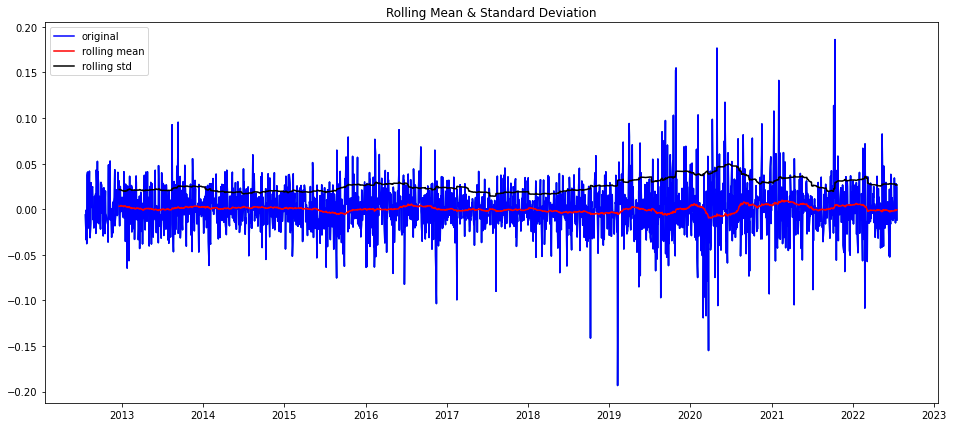

In [45]:
#Lets try Differencing
plt.figure(figsize=(16,7))
fig=plt.figure(1)
ts_log_diff=ts_log-ts_log.shift(periods=1, axis = 0)
plt.plot(ts_log_diff)

#Determining rolling statistics
rollmean = ts_log_diff.rolling(100).mean()
rollstd = ts_log_diff.rolling(100).std()

#plot rolling statistics
orig = plt.plot(ts_log_diff,color = 'blue',label='original')
mean = plt.plot(rollmean,color = 'red',label = 'rolling mean')
std = plt.plot(rollstd,color = 'black',label = 'rolling std')
plt.legend(loc = 'best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block = False)

Now we are going to create an ARIMA model and will train it with the closing price of the stock on the train data. So let us split the data into training and test set and visualize it.

In [90]:
ts_log_diff

Date
2012-07-19         NaN
2012-07-20   -0.006247
2012-07-23   -0.033454
2012-07-24   -0.000926
2012-07-25   -0.013292
                ...   
2022-07-13   -0.008045
2022-07-14    0.002222
2022-07-15    0.027989
2022-07-18    0.024016
2022-07-19   -0.011824
Name: Close, Length: 2464, dtype: float64

In [94]:
ts=ts_log_diff.dropna()

In [95]:
def check_stationarity(series):
    result = adfuller(series.values)

    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))

    if (result[1] <= 0.05) & (result[4]['5%'] > result[0]):
        print("\u001b[32mStationary\u001b[0m")
    else:
        print("\x1b[31mNon-stationary\x1b[0m")

check_stationarity(ts)     

ADF Statistic: -48.550122
p-value: 0.000000
Critical Values:
	1%: -3.433
	5%: -2.863
	10%: -2.567
Stationary


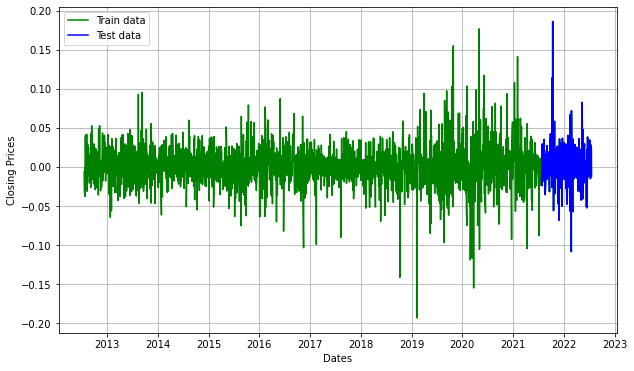

In [96]:
#split data into train and training set
train_data, test_data = ts[3:int(len(ts)*0.9)], ts[int(len(ts)*0.9):]
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Closing Prices')
plt.plot(ts, 'green', label='Train data')
plt.plot(test_data, 'blue', label='Test data')
plt.legend()

Its time to choose parameters p,q,d for ARIMA model. we are going to use Auto ARIMA to get the best parameters without even plotting ACF and PACF graphs.



In [97]:
from statsmodels.tsa.arima_model import ARIMA
from pmdarima.arima import auto_arima

model_autoARIMA = auto_arima(train_data, start_p=0, start_q=0,
                      test='adf',       # use adftest to find             optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)
print(model_autoARIMA.summary())

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-9750.380, Time=0.13 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=-9750.659, Time=0.04 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=-9750.695, Time=0.27 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=-9749.077, Time=0.33 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=-9748.833, Time=0.11 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=-9746.830, Time=0.47 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-9748.767, Time=0.73 sec

Best model:  ARIMA(0,0,1)(0,0,0)[0]          
Total fit time: 2.109 seconds
                           Statespace Model Results                           
Dep. Variable:                      y   No. Observations:                 2213
Model:               SARIMAX(0, 0, 1)   Log Likelihood                4877.348
Date:                Tue, 19 Jul 2022   AIC                          -9750.695
Time:                        09:31:45   BIC                          -9739.291
Sample:         

So the Auto ARIMA model provided the value of p, d, and q as 0, 0 and 1 respectively.


Before moving forward, let’s review the residual plots from auto ARIMA.

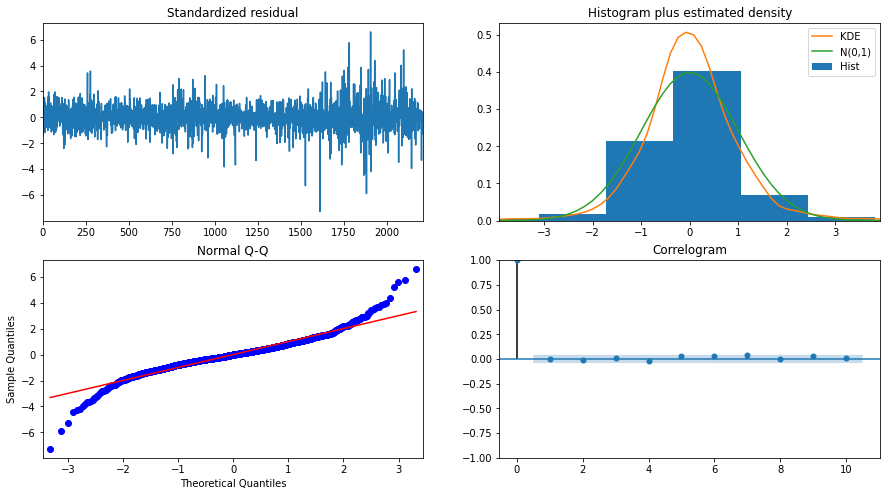

In [98]:
model_autoARIMA.plot_diagnostics(figsize=(15,8))
plt.show()

**the plot diagnostics**

1. The residual errors seem to fluctuate around a mean of zero and have a uniform variance.
2. The density plot suggest normal distribution with mean zero
3. All the dots should fall perfectly in line with the red line. Any significant deviations would imply the distribution is skewed.
4. The Correlogram, aka, ACF plot shows the residual errors are not autocorrelated. Any autocorrelation would imply that there is some pattern in the residual errors which are not explained in the model




In [100]:
model = ARIMA(train_data, order=(0, 0, 1))  
fitted = model.fit(disp=-1)  
print(fitted.summary())

                              ARMA Model Results                              
Dep. Variable:                  Close   No. Observations:                 2213
Model:                     ARMA(0, 1)   Log Likelihood                4877.384
Method:                       css-mle   S.D. of innovations              0.027
Date:                Tue, 19 Jul 2022   AIC                          -9748.768
Time:                        09:32:08   BIC                          -9731.661
Sample:                             0   HQIC                         -9742.519
                                                                              
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.0002      0.001      0.268      0.789      -0.001       0.001
ma.L1.Close     0.0326      0.021      1.521      0.128      -0.009       0.075
                                    Roots       

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



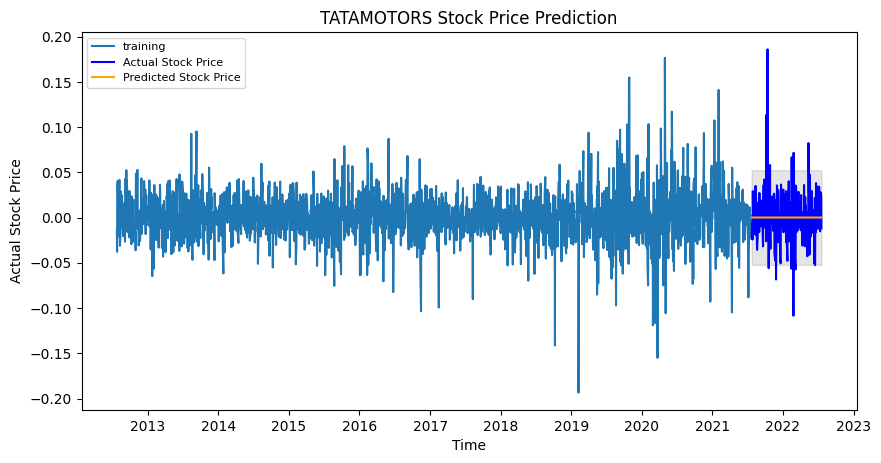

In [101]:
# Forecast
fc, se, conf = fitted.forecast(247, alpha=0.05)  # 95% confidence
fc_series = pd.Series(fc, index=test_data.index)
lower_series = pd.Series(conf[:, 0], index=test_data.index)
upper_series = pd.Series(conf[:, 1], index=test_data.index)
plt.figure(figsize=(10,5), dpi=100)
plt.plot(train_data, label='training')
plt.plot(test_data, color = 'blue', label='Actual Stock Price')
plt.plot(fc_series, color = 'orange',label='Predicted Stock Price')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.10)
plt.title('TATAMOTORS Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Actual Stock Price')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [102]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math
# report performance
mse = mean_squared_error(test_data, fc)
print('MSE: '+str(mse))
mae = mean_absolute_error(test_data, fc)
print('MAE: '+str(mae))
rmse = math.sqrt(mean_squared_error(test_data,fc))
print('RMSE: '+str(rmse))
mape = np.mean(np.abs(fc - test_data)/np.abs(test_data))
print('MAPE: '+str(mape))

MSE: 0.0007984472147721597
MAE: 0.019279167867448453
RMSE: 0.028256808290607765
MAPE: inf
